from seaborn import load_dataset
penguins = load_dataset ("penguins")
penguins = penguins.dropna()
penguins.head()

In [82]:
from seaborn import load_dataset 
penguins = load_dataset ("penguins") 
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [83]:
import pandas as pd 
import numpy as np 
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt
import dabl

%matplotlib inline

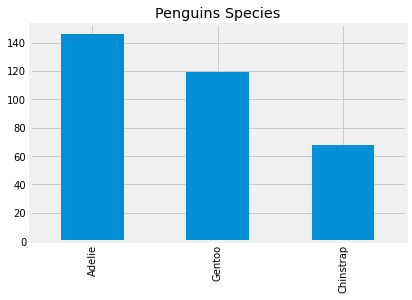

In [84]:
penguins.species.value_counts().plot(
    kind="bar",
    title="Penguins Species"
);

In [85]:
penguins.island.value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

In [86]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


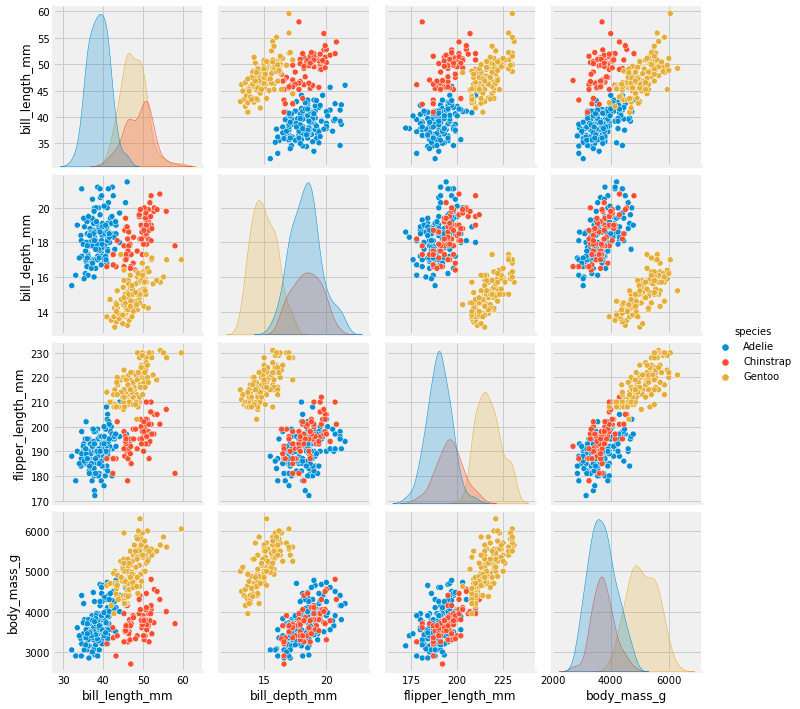

In [87]:
sns.pairplot(
    penguins, hue="species"
)

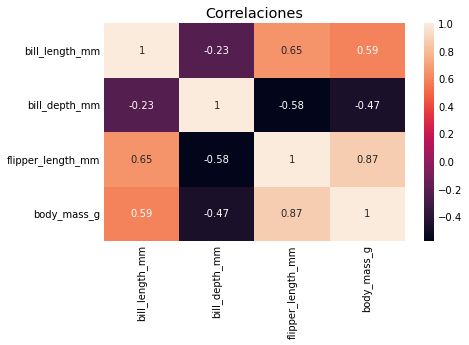

In [88]:
sns.heatmap(penguins.corr(), annot=True)
plt.title('Correlaciones')
plt.show()

Target looks like classification
Linear Discriminant Analysis training set score: 0.983


C:\Users\andre\anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


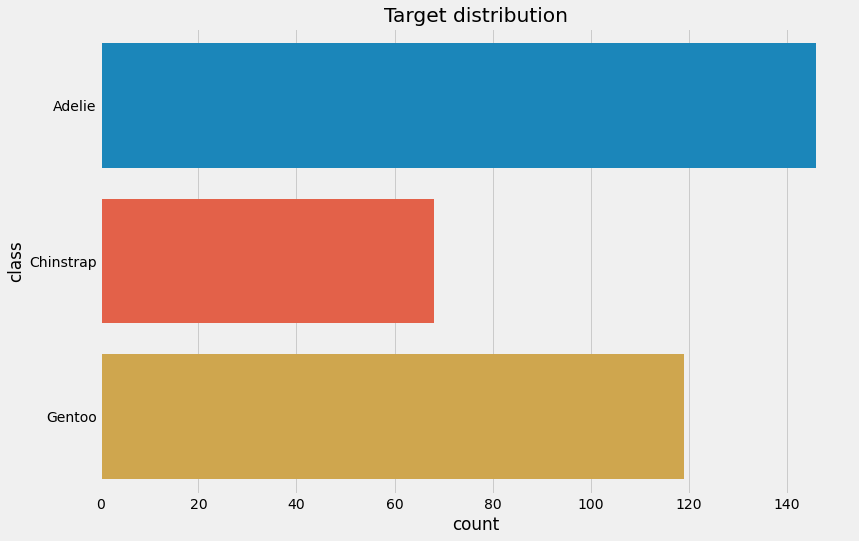

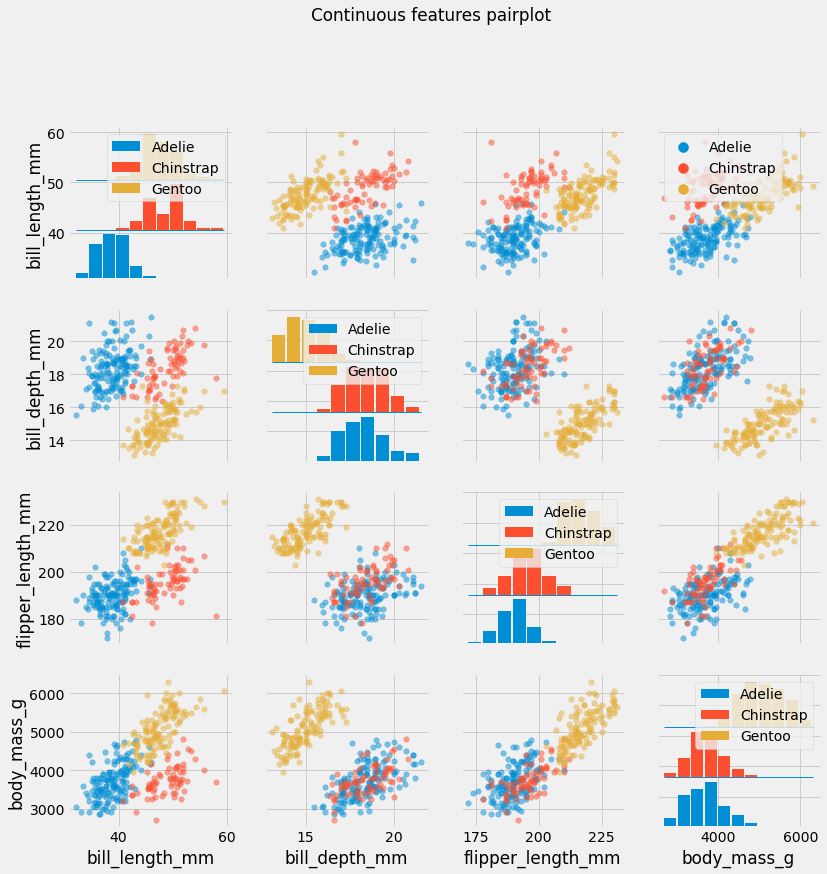

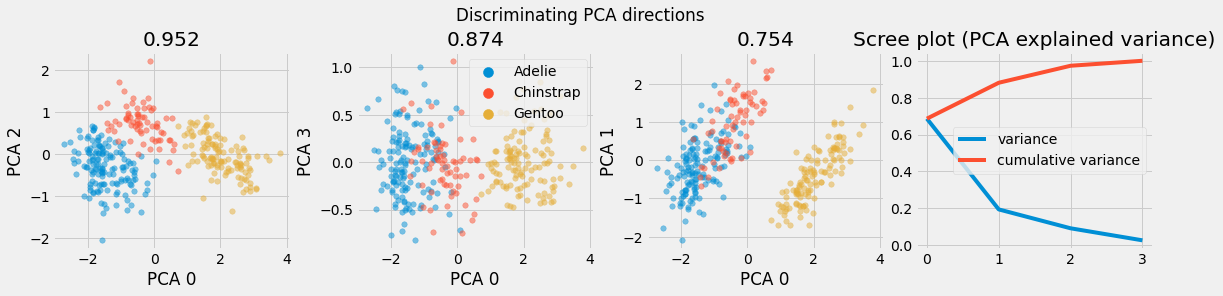

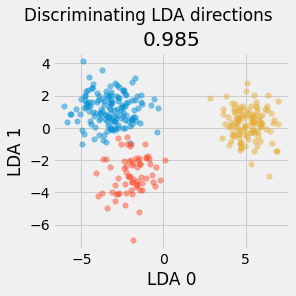

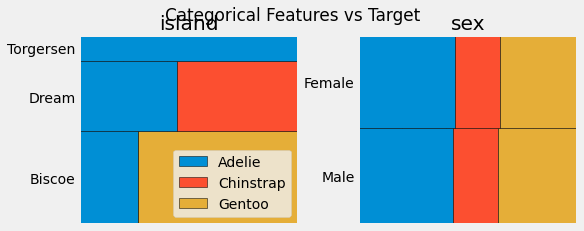

In [89]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('fivethirtyeight')
dabl.plot(penguins, target_col='species')
plt.show();

In [90]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [91]:
X= penguins[['island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex']]


In [92]:
from sklearn import ensemble
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [93]:
one_hot_cols = [
    'island', 
    'sex', 
]
num_cols = [c for c in X.columns if c not in one_hot_cols]






In [94]:
transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore') ,one_hot_cols),
    remainder='passthrough' )


In [95]:
transformed = transformer.fit_transform(X)
transformed_df = pd.DataFrame(
    transformed,
    columns=transformer.get_feature_names()
)
transformed_df.head()

C:\Users\andre\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,onehotencoder__x0_Biscoe,onehotencoder__x0_Dream,onehotencoder__x0_Torgersen,onehotencoder__x1_Female,onehotencoder__x1_Male,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0.0,0.0,1.0,0.0,1.0,39.1,18.7,181.0,3750.0
1,0.0,0.0,1.0,1.0,0.0,39.5,17.4,186.0,3800.0
2,0.0,0.0,1.0,1.0,0.0,40.3,18.0,195.0,3250.0
3,0.0,0.0,1.0,1.0,0.0,36.7,19.3,193.0,3450.0
4,0.0,0.0,1.0,0.0,1.0,39.3,20.6,190.0,3650.0


In [97]:
X1= transformed_df



In [98]:
y= penguins["species"]
y

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 333, dtype: object

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import precision_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.33, random_state=123)

In [101]:
clf_tree = DecisionTreeClassifier(max_depth=3)
clf_tree.fit(X_train, y_train)
predictions_tree = clf_tree.predict(X_test)
predictions_tree

array(['Chinstrap', 'Chinstrap', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Chinstrap', 'Adelie',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
   

In [104]:
accuracy_score(y_test, predictions_tree)


0.9454545454545454

In [111]:
precision_score(y_test, predictions_tree, labels = ('Adelie','Chinstrap','Gentoo'), average = None)

array([0.92      , 0.92857143, 1.        ])

In [106]:
confusion_matrix(y_test, predictions_tree)

array([[46,  1,  0],
       [ 4, 26,  0],
       [ 0,  1, 32]], dtype=int64)

C:\Users\andre\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


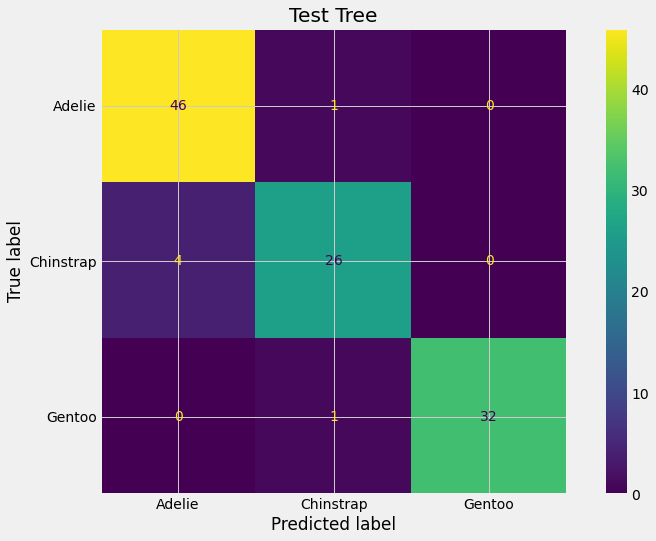

In [105]:
confusion_matrix(y_test, predictions_tree)
plot_confusion_matrix(clf_tree, X_test, y_test)
plt.title("Test Tree")
plt.show()